# Applied Social Network Analysis in Python

## Chapter 4-3. Link Prediction
* **[Lecture video](https://www.coursera.org/lecture/python-social-network-analysis/link-prediction-hvFPZ)**

<hr>
we're going to look at a related problem which is given a fixed network, can we predict how this network is going to look in the future. And more specifically, we're going to be looking at the link prediction problem

### Link prediction

What new edges are likely to form in a network you have?

Given a pair of nodes, how to assess whether they are likely to connect?

**Triadic Closure** : the tendency for people who share connections in a social network to become connected. 

So triadic closure actually gives us a hint for what the first measure that we're going to look at is.


<hr>

### Measurement 1 : Common Neighbors
This is very simple measure, just look at the number of common neighbors that the two nodes have.<br>
The number of common neighbors of nodes $X$ and $Y$ is 
$$
comm\_neigh(X,Y) = |N(X) \cap N(Y)|
$$
where $N(X)$ is the set of neighbors of node X.

In network X, we can use the function common neighbors, which takes in as input the graph to nodes.

what I'm doing is I'm creating a list of tuples which have the two nodes and the number of common neighbors.<br>
And I'm only including the nodes that are not connected with each other. The ones that don't have an edge between them by using the function `non_edges`.

common_neigh : [('C', 'A', 2), ('G', 'C', 1), ('G', 'A', 1), ('H', 'F', 1), ('H', 'E', 1), ('H', 'I', 1), ('C', 'E', 1), ('F', 'D', 1), ('F', 'I', 1), ('F', 'B', 1), ('F', 'A', 1), ('D', 'E', 1), ('E', 'I', 1), ('E', 'B', 1), ('G', 'D', 0), ('G', 'B', 0), ('H', 'C', 0), ('H', 'D', 0), ('H', 'A', 0), ('H', 'B', 0), ('C', 'I', 0), ('D', 'I', 0), ('A', 'I', 0), ('I', 'B', 0)]


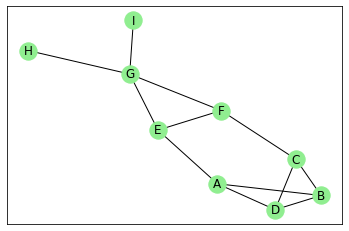

In [1]:
# Import NetworkX and set matplotlib enable to print in ipython notebook
import operator
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.Graph()

# add edges into graph.
edge_list = [
    ('A','B'),('A','D'),('A','E'),('B','D'),('B','C'),('D','C'),
    ('C','F'),('F','E'),('F','G'),('E','G'),('G','H'),('G','I'),
]

for n1, n2, in edge_list:
    G.add_edge(n1, n2)
    
pos = nx.spring_layout(G, seed=201703)

nx.draw_networkx(G, pos, node_color='lightgreen') # Undirected

common_neigh = []
for n1, n2 in nx.non_edges(G):
    length = len(list(nx.common_neighbors(G, n1, n2)))
    common_neigh.append((n1, n2, length))

common_neigh = sorted(common_neigh, key=operator.itemgetter(2), reverse=True)
print(f'common_neigh : {common_neigh}')
plt.show()

<hr>

### Measurement 2 : Jaccard Coefficient

Number of Common neighbors normalized by the total number of neighbors.

what it does is that it looks at the number of common neighbors but it normalizes it by the total number of neighbors of the two nodes. <br>So the way that we write it down is we say the Jaccard coefficient of nodes X and Y is going to be the fraction of the number of common neighbors. 

The Jaccard coefficient of nodes $X$ and $Y$ is
$$
jacc\_coeff(X,Y) = {|N(X) \cap N(Y)| \over |N(X) \cup N(Y)|}
$$

for example, 
$$
jacc\_coeff(A,C) = {|\{B,D\}| \over |\{B,D,E,F\}|} = {2\over4}={1\over2}
$$

In network X, we can use the function jaccard_coefficient which takes as input the graph and it outputs an iterator of tuples which have the two nodes and the Jaccard coefficient of the two nodes. 

```python
L = list(nx.jaccard_coefficient(G))
L.sort(key=operator.itemgetter(2), reverse=True)
print(L)
```
> [('H', 'I', 1.0), ('A', 'C', 0.5), ('H', 'E', 0.3333333333333333), ('H', 'F', 0.3333333333333333), ('I', 'E', 0.3333333333333333), ('I', 'F', 0.3333333333333333), ('D', 'E', 0.2), ('D', 'F', 0.2), ('A', 'F', 0.2), ('E', 'B', 0.2), ('E', 'C', 0.2), ('B', 'F', 0.2), ('G', 'A', 0.16666666666666666), ('G', 'C', 0.16666666666666666), ('G', 'D', 0.0), ('G', 'B', 0.0), ('H', 'D', 0.0), ('H', 'A', 0.0), ('H', 'B', 0.0), ('H', 'C', 0.0), ('I', 'D', 0.0), ('I', 'A', 0.0), ('I', 'B', 0.0), ('I', 'C', 0.0)]

<hr>

### Measurement 3 : Resource Allocation

Fraction of a "resource" that a node can send to another through their common neibors.

Resource Allocation index of the nodes X, Y is going to be the sum over all the common neighbors of X and Y of one over the degree of the nodes. So in this case, if X and Y have a lot of common neighbors and they're going to have a large Resource Allocation index. 

The Resource Allocation index of nodes $X$ and $Y$ is 
$$
res\_alloc(X,Y) = \sum_{u\in N(X)\cap N(Y)}{1\over|N(u)|}
$$

But if they have a lot of neighbors that have low degree, then they're going to have an even larger Resource Allocation index. Now what's the intuition behind this? Let's consider two nodes X and Y, and let's say that we're measuring the Resource Allocation index between these two nodes.

But actually what Z does is that when it receives this unit from X is going to distribute this unit evenly among all the neighbors of Z. <br>
in that case, Y is only going to get a fraction of that unit. And which fraction depends on what the degree of Z is. So if Z has degree N, then Y is only going to get 1 over N of that unit. And so if Z is the only common neighbor of X and Y, and Z has a lot of neighbors, a very large degree.

$Z$ has $n$ neighbors $X$ sends 1 unit to $Z$, $Z$ distributes the unit evenly among all neighbors -> $Y$ receives ${1\over n}$ of the unit

<img src="./figures/Measurement3.png" width="300" height="200">

So that's why this research allocation index penalizes pairs of nodes that have common neighbors that themselves have lots of other neighbors.

for example,

$$
res\_alloc(A,C)={1\over 3}+{1\over 3} = {2\over 3}
$$

We can use the function of `resource_allocation_index(G)` to compute the Resource Allocation index of all pairs of nodes that are not connected by an edge already in the graph. And if we sort it, we can see the Resource Allocation index of all pairs in a given network.

```python
L = list(nx.resource_allocation_index(G))
L.sort(key=operator.itemgetter(2), reverse=True)
print(L)
```
> [('A', 'C', 0.6666666666666666), ('G', 'A', 0.3333333333333333), ('G', 'C', 0.3333333333333333), ('D', 'E', 0.3333333333333333), ('D', 'F', 0.3333333333333333), ('A', 'F', 0.3333333333333333), ('E', 'B', 0.3333333333333333), ('E', 'C', 0.3333333333333333), ('B', 'F', 0.3333333333333333), ('H', 'I', 0.25), ('H', 'E', 0.25), ('H', 'F', 0.25), ('I', 'E', 0.25), ('I', 'F', 0.25), ('G', 'D', 0), ('G', 'B', 0), ('H', 'D', 0), ('H', 'A', 0), ('H', 'B', 0), ('H', 'C', 0), ('I', 'D', 0), ('I', 'A', 0), ('I', 'B', 0), ('I', 'C', 0)]

<hr>

### Measurement 4 : Adamic-Adar Index
Adamic-Adar Index is very similar to the research allocation index. The only difference is that rather than dividing by the degree, it divides by the log of the degree. 

Similar to resource allocation index, but with log in the denominator.

The Adamic-Adar index of nodes $X$ and $Y$ is
$$
adamic\_adar(X,Y) = \sum_{u\in N(X)\cap N(Y)}{1\over log(|N(u)|)}
$$

for example,

$$
adamic\_adar(A,C) = {1\over log(3)}+{1\over log(3)} = 1.82
$$

And there's a function for it too that you can use in network X is `adamic_adar_index(G)`.
```python
L = list(nx.adamic_adar_index(G))
L.sort(key=operator.itemgetter(2), reverse=True)
print(L)
```
>[('A', 'C', 1.8204784532536746), ('G', 'A', 0.9102392266268373), ('G', 'C', 0.9102392266268373), ('D', 'E', 0.9102392266268373), ('D', 'F', 0.9102392266268373), ('A', 'F', 0.9102392266268373), ('E', 'B', 0.9102392266268373), ('E', 'C', 0.9102392266268373), ('B', 'F', 0.9102392266268373), ('H', 'I', 0.7213475204444817), ('H', 'E', 0.7213475204444817), ('H', 'F', 0.7213475204444817), ('I', 'E', 0.7213475204444817), ('I', 'F', 0.7213475204444817), ('G', 'D', 0), ('G', 'B', 0), ('H', 'D', 0), ('H', 'A', 0), ('H', 'B', 0), ('H', 'C', 0), ('I', 'D', 0), ('I', 'A', 0), ('I', 'B', 0), ('I', 'C', 0)]

<hr>

### Measurement 5 : Pref. Attachment

In the preferential attachment model, nodes with high degree get more neighbors.

The preferential attachment model has the feature that nodes that have very high degree are more likely to get more neighbors. And so, the intuition behind this measure is that, if I'm looking at a pair of nodes and they both have a very high degree, then they're more likely to be connected to each other in the future.

**Product of the nodes' degree.**

The preferential attachment score of nodes $X$ and $Y$ is 
$$
pref\_attach(X,Y) = |N(X)||N(Y)|
$$

for example,

$$
pref\_attach(A,C) = 3 \times 3 = 9
$$

And there's a function for it too that you can use in network X is `adamic_adar_index(G)`.

```python
L = list(nx.preferential_attachment(G))
L.sort(key=operator.itemgetter(2), reverse=True)
print(L)
```
>[('G', 'D', 12), ('G', 'A', 12), ('G', 'B', 12), ('G', 'C', 12), ('D', 'E', 9), ('D', 'F', 9), ('A', 'F', 9), ('A', 'C', 9), ('E', 'B', 9), ('E', 'C', 9), ('B', 'F', 9), ('H', 'D', 3), ('H', 'A', 3), ('H', 'E', 3), ('H', 'B', 3), ('H', 'C', 3), ('H', 'F', 3), ('I', 'D', 3), ('I', 'A', 3), ('I', 'E', 3), ('I', 'B', 3), ('I', 'C', 3), ('I', 'F', 3), ('H', 'I', 1)]


<hr>

### Community Structure

Some measures consider the community structure of the network for link prediction.

Assume the nodes in ths network belong to different communities (sets of nodes).

Pairs of nodes who belong to the same community and have many common neighbors in their community are likely to form an edge.

<img src="./figures/Community_Structure.png" width="200" height="200">

### Measurement 6 : Community Common Neighbors

Number of common neighbors with bonus for neighbors in same community.

The Common Neighbor Soundarajan-Hopcroft score of nodes $X$ and $Y$ is :
$$
cn\_soundaraja\_hopcroft(X,Y) = |N(X)\cap N(Y)| + \sum_{u\in N(X)\cap N(Y)}f(u) \;, \quad {where}  \begin{cases}
    {} \\ {}
  \end{cases}
  \begin{array}{@{}l}
    x= 1, u\; in\; same\; comm.\; as\; X\; and\; Y\\[6pt]
    y= 0, otherwise
  \end{array}
$$

what we do is we sum over all the neighbors of X and Y. Rather than summing just one over the degree of the nodes of the common neighbors like we did in the standard Resource Allocation index. 

We now have this f(u) in the denominator of the fraction. And this function f(u) again is the same as before is 1, if u belongs to the same community as X and Y, and 0 otherwise.

for example,

$$
cn\_soundaraja\_hopcroft(A,C) = 2+2 = 4\\
cn\_soundaraja\_hopcroft(E,I) = 1+1 = 2\\
cn\_soundaraja\_hopcroft(A,G) = 1+0 = 1
$$

In [2]:
G = nx.Graph()

# add edges into graph.
edge_list = [
    ('A','B'),('A','D'),('A','E'),('B','D'),('B','C'),('D','C'),
    ('C','F'),('F','E'),('F','G'),('E','G'),('G','H'),('G','I'),
]

# In Networkx, you need to assign nodes to communities.
communities = [['A','B','C','D'], ['E','F','G','H','I']]

for n1, n2, in edge_list:
    G.add_edge(n1, n2)

for c_idx, c_nodes in enumerate(communities):
    for n in c_nodes:
        G.nodes[n]['community'] = c_idx
        
L = list(nx.cn_soundarajan_hopcroft(G))
L.sort(key=operator.itemgetter(2), reverse=True)
print(L)

[('C', 'A', 4), ('H', 'F', 2), ('H', 'E', 2), ('H', 'I', 2), ('F', 'I', 2), ('E', 'I', 2), ('G', 'C', 1), ('G', 'A', 1), ('C', 'E', 1), ('F', 'D', 1), ('F', 'B', 1), ('F', 'A', 1), ('D', 'E', 1), ('E', 'B', 1), ('G', 'D', 0), ('G', 'B', 0), ('H', 'C', 0), ('H', 'D', 0), ('H', 'A', 0), ('H', 'B', 0), ('C', 'I', 0), ('D', 'I', 0), ('A', 'I', 0), ('I', 'B', 0)]


<hr>

### Measurement 7 : Community Resource Allocation

Similar to resource allocation index, but **only considering nodes in the same community**.

The Resource Allocation Soundarajan-Hopcroft score of nodes $X$ and $Y$ is:

$$
ra\_soundarajan\_hopcoft(X,Y) = \sum_{u\in N(X)\cap N(Y)}{f(u)\over|N(u)|'}
$$

for example, 

$$
ra\_soundarajan\_hopcoft(A,C) = {1\over3}+{1\over3}={2\over3}\\
ra\_soundarajan\_hopcoft(E,I) = {1\over4}\\
ra\_soundarajan\_hopcoft(A,G) = 0
$$

We can use this function in network X, `ra_index_soundarajan_hopcroft(G)` to compute the scores of all the non edges. 

```python
L = list(nx.ra_index_soundarajan_hopcroft(G))
L.sort(key=operator.itemgetter(2), reverse=True)
print(L)
```
>[('A', 'C', 0.6666666666666666), ('E', 'H', 0.25), ('E', 'I', 0.25), ('I', 'H', 0.25), ('I', 'F', 0.25), ('H', 'F', 0.25), ('A', 'G', 0), ('A', 'I', 0), ('A', 'H', 0), ('A', 'F', 0), ('D', 'G', 0), ('D', 'E', 0), ('D', 'I', 0), ('D', 'H', 0), ('D', 'F', 0), ('B', 'G', 0), ('B', 'E', 0), ('B', 'I', 0), ('B', 'H', 0), ('B', 'F', 0), ('G', 'C', 0), ('E', 'C', 0), ('I', 'C', 0), ('H', 'C', 0)]

<hr>

* none of these measures actually tell you whether or not you should predict that a particular edge is going to come up in the future or not. It just gives a score that is supposed to give you a sense for whether or not these two nodes are likely to connect. 

* different measures can give you different scores. so these measures aren't necessarily consistent with each other.

So if you're actually trying to solve the link-prediction problem, typically what would happen is that you would use these measures as features. And then you would use a classifier, if you have some label data, you would train a classifier and use these measures as features in order to make the prediction. 